In [1]:
!git clone -b atm-10 http://github.com/Zapy67/ATML-PA-4 

Cloning into 'ATML-PA-4'...


remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 173 (delta 114), reused 108 (delta 54), pack-reused 0 (from 0)
Receiving objects: 100% (173/173), 351.25 KiB | 7.17 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [211]:
!git pull  http://github.com/Zapy67/ATML-PA-4 atm-10

remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 10 (delta 8), reused 10 (delta 8), pack-reused 0 (from 0)
Unpacking objects: 100% (10/10), 3.63 KiB | 619.00 KiB/s, done.
From http://github.com/Zapy67/ATML-PA-4
 * branch            atm-10     -> FETCH_HEAD
Updating 822c2c8..2317b2a
Fast-forward
 fed_lib/utils.py |  15 +-
 fedsam.ipynb     | 503 +++++++------------------------------------------------
 2 files changed, 64 insertions(+), 454 deletions(-)


In [1]:
%cd ATML-PA-4

/kaggle/working/ATML-PA-4


In [2]:
!ls

'ATML - PA 4.pdf'   fed_lib	   LICENSE     task1.ipynb   task3.ipynb
 data		    fedsam.ipynb   README.md   task2.ipynb   task4.ipynb


#  FedSAM on heterogeneous domains

In [212]:
import torch
import torch.nn as nn

In [213]:
import fed_lib
import importlib
importlib.reload(fed_lib)


<module 'fed_lib' from '/kaggle/working/ATML-PA-4/fed_lib/__init__.py'>

In [6]:
!pip install fedlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.6 MB/s eta 0:

In [217]:
from fed_lib import fed_methods, fed_model, utils
importlib.reload(utils)
importlib.reload(fed_methods)
importlib.reload(fed_model)

<module 'fed_lib.fed_model' from '/kaggle/working/ATML-PA-4/fed_lib/fed_model.py'>

In [218]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [219]:
trainset, testset = utils.get_cifar10()

In [220]:
client_loaders = utils.get_heterogenous_domains(trainset, clients=5, balance=False, min_require_size=20, alpha=2, verbose=True)

In [221]:
for idx, loader in enumerate(client_loaders):
    utils.calculate_label_skew(loader.dataset)

Label Distribution (P(Y)): [0.135 0.081 0.05  0.02  0.115 0.225 0.106 0.07  0.057 0.141]
Entropy of Label Distribution H(P(Y)): 2.0564825184573094
Normalized Entropy of Label Distribution: 0.8931190098965116

Label Distribution (P(Y)): [0.027 0.112 0.003 0.073 0.148 0.044 0.074 0.163 0.138 0.218]
Entropy of Label Distribution H(P(Y)): 1.9754108527507208
Normalized Entropy of Label Distribution: 0.8579100328414351

Label Distribution (P(Y)): [0.096 0.186 0.215 0.221 0.015 0.032 0.163 0.073]
Entropy of Label Distribution H(P(Y)): 1.7868040713990159
Normalized Entropy of Label Distribution: 0.8592711242825233

Label Distribution (P(Y)): [0.23  0.123 0.058 0.059 0.077 0.084 0.077 0.087 0.021 0.185]
Entropy of Label Distribution H(P(Y)): 2.04168839858929
Normalized Entropy of Label Distribution: 0.8866940052732156

Label Distribution (P(Y)): [0.061 0.015 0.151 0.109 0.135 0.113 0.075 0.101 0.24 ]
Entropy of Label Distribution H(P(Y)): 1.9621266396109156
Normalized Entropy of Label Distribut

In [222]:
client_weights = [len(client.dataset.indices)/len(trainset.dataset) for client in client_loaders]
domains = None

In [223]:
client_weights

[0.20124, 0.20774, 0.21058, 0.14286, 0.23758]

In [224]:
partition = "dirichlet"
alpha = 1
num_clients = 1
domains=None
fed = fed_model.Federation(num_clients, None, partition, domains, alpha, device, batch_size=64, pin_memory=True, num_workers=2)

In [225]:
client_loaders = fed.client_dataloaders
client_weights = [len(client.dataset.indices)/len(trainset.dataset) for client in client_loaders]

In [226]:
fed.set_method(fed_methods.FedSAM(sam_rho=0, 
             num_local_steps=1563, 
             client_aggregation_weights= client_weights))

In [229]:
fed.train(5, lr=3e-4, verbose=False, momentum = 0, weight_decay=0)


--- Round 1/5 ---
Training Clients
Training Client 1/1
Training Server
Evaluate on round 1:


FedSAM  | Test Loss: 4.0571, Test Acc: 10.24%

--- Round 2/5 ---
Training Clients
Training Client 1/1
Training Server
Evaluate on round 2:


FedSAM  | Test Loss: 4.0849, Test Acc: 10.06%

--- Round 3/5 ---
Training Clients
Training Client 1/1
Training Server
Evaluate on round 3:


FedSAM  | Test Loss: 4.0422, Test Acc: 10.07%

--- Round 4/5 ---
Training Clients
Training Client 1/1


Exception in thread Thread-779 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py", line 59, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py", line 35, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/torch/multiprocessing/reductions.py", line 541, in rebuild_storage_fd
    fd = df.detach()
         ^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/resource_

KeyboardInterrupt: 

truck
07:46:35 - matplotlib.image - WARNING - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


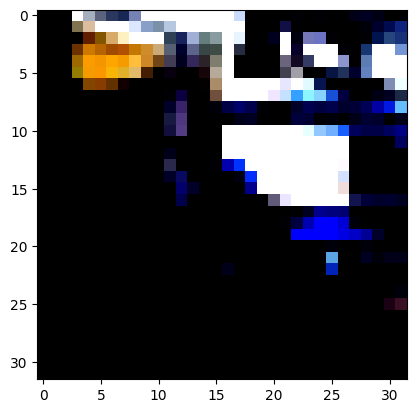

In [247]:
X, Y = next(iter(trainset))
import matplotlib.pyplot as plt

print(trainset.dataset.classes[Y[0].item()])
plt.imshow(X[0].permute(1,2,0))
